In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [35]:
#Check all columns name
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

# Handling missing values

In [36]:
# Identifying categorical variables and checking for missing values
categorical_columns = df.select_dtypes(include=['object']).columns
missing_values = df.isnull().mean() * 100  # percentage of missing values

# Summarize categorical variables and missing values
categorical_summary = pd.DataFrame({
    'column_name': categorical_columns,
    'missing_percentage': missing_values[categorical_columns]
}).reset_index(drop=True)

categorical_summary.sort_values(by='missing_percentage', ascending=False)


,column_name,missing_percentage
59,AINextVery similar,97.061132
58,AINextSomewhat similar,93.005472
57,AINextNeither different nor similar,92.600691
56,AINextVery different,85.803507
42,AIDevWantToWorkWith,78.037540
...,...,...
17,Country,1.357867
6,EdLevel,1.357867
1,MainBranch,0.000000
2,Age,0.000000


In [37]:
# Remove columns with more than 70% missing values
columns_to_drop = categorical_summary[categorical_summary['missing_percentage'] > 70]['column_name']
df_cleaned = df.drop(columns=columns_to_drop)

# Impute missing values for 'EdLevel' and 'Country' with the most common value (mode)
for col in ['EdLevel', 'Country']:
    mode_value = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_value, inplace=True)

# Check the missing percentage after cleaning for a few columns to confirm changes
missing_values_after = df_cleaned[['EdLevel', 'Country']].isnull().mean() * 100  # percentage of missing values

missing_values_after


EdLevel    0.0
Country    0.0
dtype: float64

# Exploring generational differences in the perception and adoption of AI

### Q1: How does the willingness to adopt AI change with programming experience?

/var/folders/t4/b9dqzjy53tv2qk39mmk6j2540000gn/T/ipykernel_25596/3086264724.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 1, 0.85, 1])  # Adjust layout to make room for legend


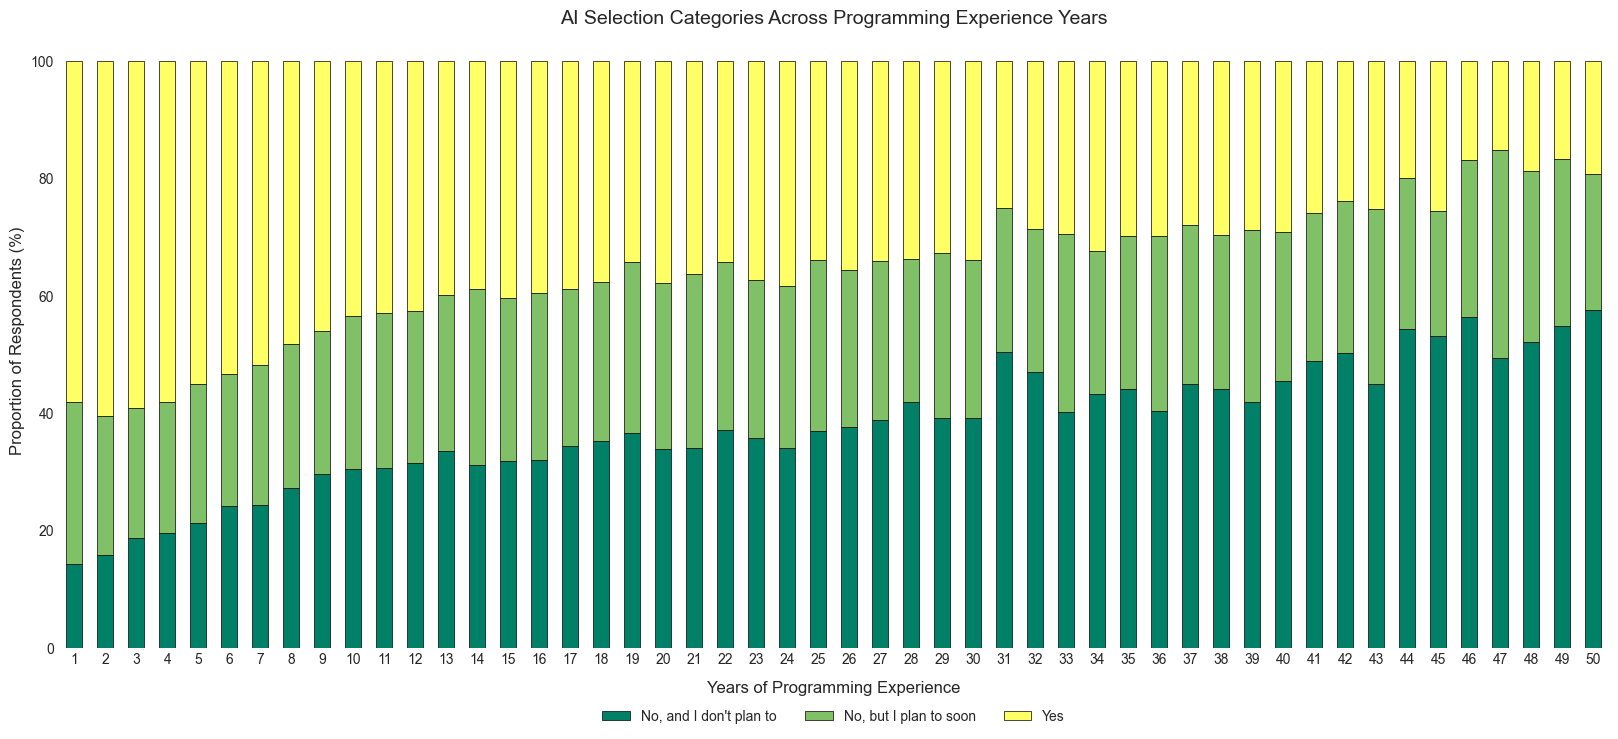

In [123]:
# Convert 'YearsCode' to numeric, handling specific cases if necessary
df_cleaned['YearsCode'] = pd.to_numeric(df_cleaned['YearsCode'], errors='coerce')
df_cleaned['YearsCode'] = df_cleaned['YearsCode'].astype('int64')
df_cleaned.dropna(subset=['YearsCode', 'AISelect'], inplace=True)

# Group data by 'YearsCode' and 'AISelect', count occurrences
grouped = df_cleaned.groupby(['YearsCode', 'AISelect']).size().unstack(fill_value=0)

# Normalize the data by row to show proportions rather than counts
grouped_prop = 100*grouped.divide(grouped.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))
grouped_prop.plot(kind='bar', stacked=True, ax=ax, colormap='summer', edgecolor='black')


# Customize the plot to have a white layout and no gridlines
ax.grid(False)
ax.set_axisbelow(True)
ax.set_facecolor('white')
fig.set_facecolor('white')

# Hide all spines for a clean
for spine in ax.spines.values():
    spine.set_visible(False)

# Move the legend to the bottom of the plot, without a box around
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=len(labels), frameon=False)

plt.title('AI Selection Categories Across Programming Experience Years', fontsize=14)
plt.xlabel('Years of Programming Experience', fontsize=12, labelpad=10)
plt.ylabel('Proportion of Respondents (%)' ,fontsize=12)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.tight_layout(rect=[1, 1, 0.85, 1])  # Adjust layout to make room for legend

plt.show();


Developers with fewer years of experience show more inclination towards adopting AI, suggesting a growing trend in AI integration among the newer generation of developers. It indicates that a majority of developers with varying years of experience have already engaged with AI ('Yes' category), showing a strong integration of AI in the field of software development. Interestingly, as the years of experience increase, a consistent pattern emerges: fewer developers plan to engage with AI ('No, but I plan to soon'), and more are certain they won’t ('No, and I don't plan to'). This could suggest that more seasoned developers are either already using AI or are set in their ways and less open to adopting it.

### Q2: What is the level of trust in AI benefits across different age groups?

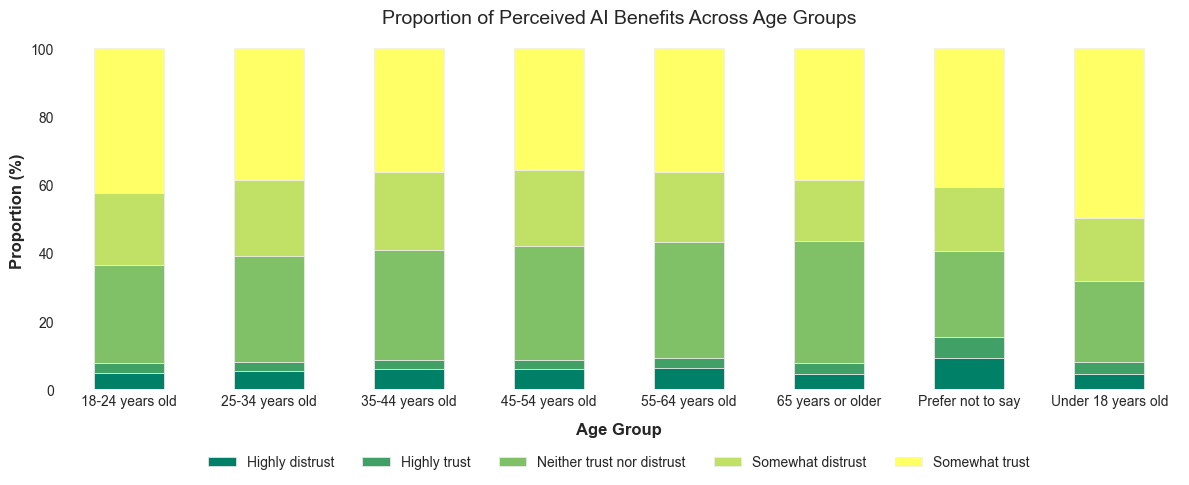

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop any NaN values in 'Age' and 'AIBen' for clarity in visualization
df_filtered = df_cleaned.dropna(subset=['Age', 'AIBen'])

# Get the proportion of each AIBen category within each Age group
age_ben_counts = df_filtered.groupby(['Age', 'AIBen']).size().unstack(fill_value=0)
age_ben_props = 100 * age_ben_counts.divide(age_ben_counts.sum(axis=1), axis=0)



# Start the plot
fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')

# Plotting the bar chart
age_ben_props.plot(kind='bar', stacked=True, ax=ax, colormap='summer')

# Customize the plot to have a white layout and no gridlines
ax.grid(False)
ax.set_axisbelow(True)
ax.set_facecolor('white')
fig.set_facecolor('white')

# Hide all spines for a clean
for spine in ax.spines.values():
    spine.set_visible(False)

# Move the legend to the bottom of the plot, without a box around
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels), frameon=False)

# Title and labels
ax.set_title('Proportion of Perceived AI Benefits Across Age Groups', fontsize=14)
ax.set_xlabel('Age Group', fontsize=12, weight='bold', labelpad=10)
ax.set_ylabel('Proportion (%)', fontsize=12, weight='bold')
ax.tick_params(axis='x', rotation=0)

# Remove y-axis tick marks for a cleaner look
ax.tick_params(axis='y', left=False, labelleft=True)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


 Younger developers display a higher level of trust in AI. In contrast, trust diminishes with age, indicating a potential generational divide in the perception of AI.
 The distribution of trust in AI's benefits across different age groups is depicted. Younger demographics (18-24 and 25-34 years old) show higher levels of trust ('Highly trust'), while older groups (55-64 and 65 or older) exhibit a greater degree of skepticism ('Neither trust nor distrust' and 'Somewhat distrust'). This might reflect generational differences in the adoption and acceptance of new technologies, with younger individuals being more optimistic about the potential of AI.

### Q3: What are the sentiments towards AI among various age groups?

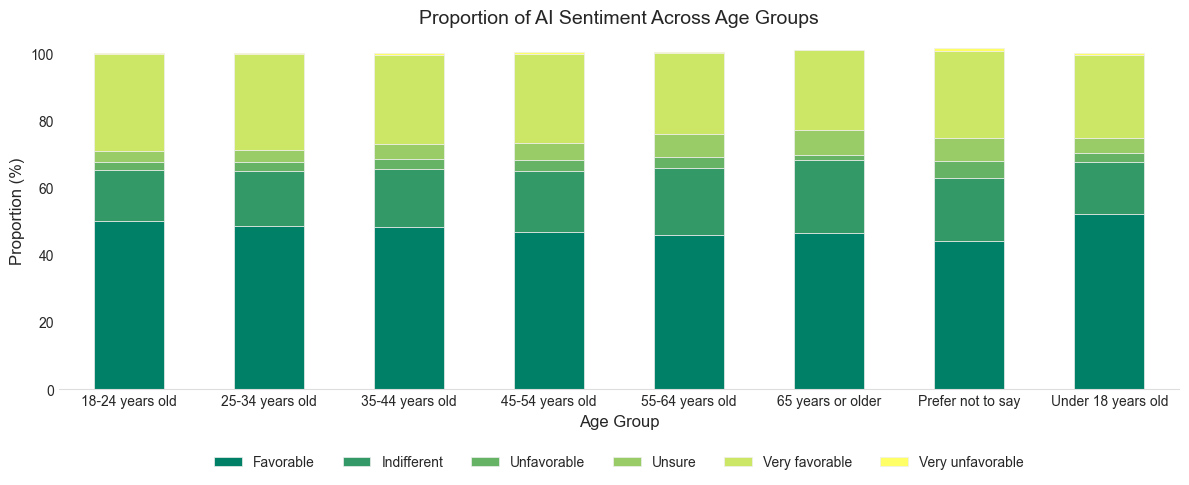

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

df_filtered_AISent = df_cleaned.dropna(subset=['Age', 'AISent'])
# Get the proportion of each AIBen category within each Age group
age_ben_counts_AISent = df_filtered_AISent.groupby(['Age', 'AISent']).size().unstack(fill_value=0)
age_ben_props_AISent = 100*age_ben_counts_AISent.divide(age_ben_counts.sum(axis=1), axis=0)

# Start the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plotting the bar chart
age_ben_props_AISent.plot(kind='bar', stacked=True, ax=ax, colormap='summer')

# Customize the plot to remove gridlines and style the legend
ax.grid(False)  # Turn off grid
ax.set_axisbelow(True)  # Ensure bars are above the grid lines if grid is turned on later
ax.set_facecolor('white')  # Set the inner plot background to white
fig.set_facecolor('white')  # Set the outer figure background to white
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Remove y-axis tick marks
ax.tick_params(left=False)

# Move the legend to the bottom of the plot, without a box around
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels), frameon=False)

# Title and labels
ax.set_title('Proportion of AI Sentiment Across Age Groups', fontsize=14)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Proportion (%)', fontsize=12)
ax.tick_params(axis='x', rotation=0)  # Keep the x-axis labels horizontal for readability

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Further explores attitudes towards AI, this time focusing on sentiment. A pattern similar to the second chart emerges, with younger people (18-24 and 25-34 years old) having a more favorable or very favorable view of AI, while older groups show a mix of sentiments, with 'Unsure' and 'Indifferent' sentiments appearing more prominently. Sentiment analysis reflects a similar generational gap: more favorable views among younger individuals and a mix of uncertainty and indifference among older ones.